# Pair

Basic examples of pairs, trying to extract fires.
Here the pivot product will be the pre-event image, the child being the post-event.

## Initialization of the notebook

- Imports
- Loggers
- Paths

In [1]:
from cloudpathlib import AnyPath
from sertit import vectors
from eosets.pair import Pair
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/PAIR")

In [4]:
# Get a dictionary of Sentinel-2, Sentinel-3 and Landsat-8 pivot and child images
s2_paths = {
    "pivot_paths": [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    "child_paths": [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"],
}

s3_paths = {
    "pivot_paths": [data_path / "S3B_SL_1_RBT____20200824T105515_20200824T105815_20200825T151744_0179_042_322_2340_LN2_O_NT_004.SEN3"],
    "child_paths": [data_path / "S3B_SL_1_RBT____20200909T104016_20200909T104316_20200910T161910_0179_043_165_2340_LN2_O_NT_004.SEN3"],
}

l8_paths = {
    "pivot_paths": [data_path / "LC08_L1TP_202032_20200828_20200906_02_T1.tar"],
    "child_paths": [data_path / "LC08_L1TP_202032_20200929_20201006_02_T1.tar"],
}

all_paths = [s2_paths, s3_paths, l8_paths]

aoi_path = data_path / "Fire_Spain.geojson"

## Creation of the Pairs and loading of dNBR

To create a pair, you just have to give the paths of your products.
The pivot and child products should overlap.

The goal here will be to extract the `dNBR` band of the pair and display it for every pair.

$$
    dNBR = NBR_{pre} - NBR_{post}

$$
$$
    NBR = \frac{NIR - SWIR}{NIR + SWIR}
$$

2023-06-07 16:25:32,231 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***
2023-06-07 16:25:34,041 - [DEBUG] - Merging bands NBR
2023-06-07 16:25:34,108 - [DEBUG] - Collocating bands
2023-06-07 16:25:34,129 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-06-07 16:25:35,808 - [DEBUG] - Merging bands NBR
2023-06-07 16:25:35,872 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


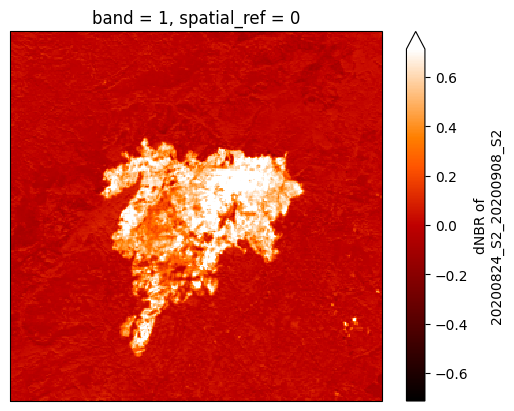

2023-06-07 16:25:44,277 - [DEBUG] - *** Loading ['NBR'] for 20200824T105515_S3_SLSTR_RBT ***
2023-06-07 16:25:59,361 - [DEBUG] - Merging bands NBR
2023-06-07 16:25:59,440 - [DEBUG] - Collocating bands
2023-06-07 16:25:59,462 - [DEBUG] - *** Loading ['NBR'] for 20200909T104016_S3_SLSTR_RBT ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-06-07 16:26:13,467 - [DEBUG] - Merging bands NBR
2023-06-07 16:26:13,528 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


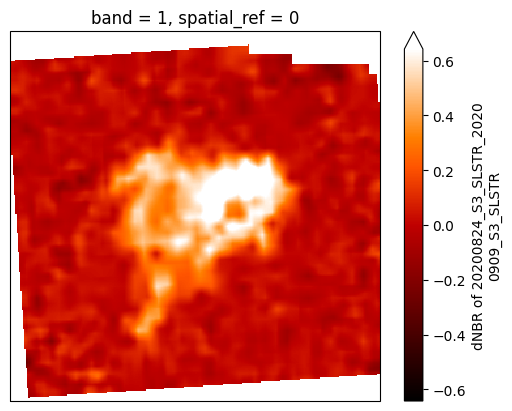

2023-06-07 16:26:17,227 - [DEBUG] - *** Loading ['NBR'] for 20200828T110153_L8_202032_OLI_TIRS ***
2023-06-07 16:26:17,704 - [DEBUG] - Merging bands NBR
2023-06-07 16:26:17,767 - [DEBUG] - Collocating bands
2023-06-07 16:26:17,791 - [DEBUG] - *** Loading ['NBR'] for 20200929T110204_L8_202032_OLI_TIRS ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-06-07 16:26:18,249 - [DEBUG] - Merging bands NBR
2023-06-07 16:26:18,310 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


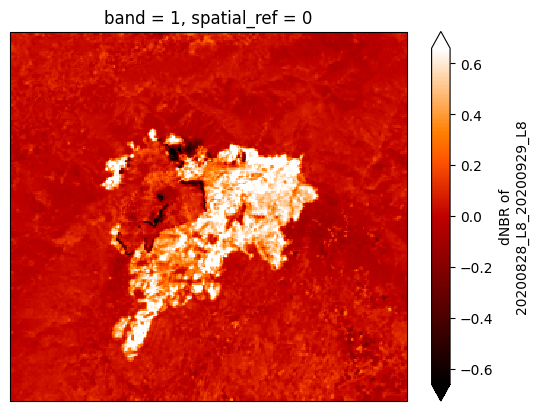

In [5]:
for paths in all_paths:
    # Create pair with pivot and child paths
    pair = Pair(**paths)

    # Load dNBR
    _, _, dnbr_ds = pair.load(
        diff_bands=NBR,
        window=aoi_path,
        pixel_size=60
    )
    dnbr = dnbr_ds[NBR]
    dnbr.attrs["long_name"] = f"dNBR of {pair.condensed_name}"

    # Plot the pairs
    crs = ccrs.UTM(str(dnbr.rio.crs.to_epsg())[-2:])
    dnbr.plot(
        robust=True,
        transform=crs,
        x="x",
        y="y",
        cmap="gist_heat",
        subplot_kws={'projection':crs}
    )
    plt.show()

## Stacking pairs

A pair can also be stacked.

In [16]:
pair = Pair(**s2_paths)
stack = pair.stack(
    pivot_bands=NBR,
    child_bands=NBR,
    diff_bands=NBR,
    window=aoi_path,
    pixel_size=60
    )
stack

2023-06-07 16:31:36,748 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***
2023-06-07 16:31:38,399 - [DEBUG] - Merging bands NBR
2023-06-07 16:31:38,459 - [DEBUG] - Collocating bands
2023-06-07 16:31:38,480 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-06-07 16:31:40,482 - [DEBUG] - Merging bands NBR
2023-06-07 16:31:40,542 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


<xarray.DataArray 'Pivot_NBR_Child_NBR_dNBR' (bands: 3, y: 271, x: 272)>
array([[[ 0.29215732,  0.4141129 ,  0.41982567, ...,  0.0864888 ,
          0.03820598,  0.00598556],
        [ 0.27878785,  0.422693  ,  0.38966158, ...,  0.08063875,
          0.03872617, -0.00363637],
        [ 0.36653206,  0.43033397,  0.49138296, ...,  0.08462457,
          0.04146922,  0.09817036],
        ...,
        [ 0.04074569,  0.01427867,  0.01138141, ...,  0.28146973,
          0.35828874,  0.55584246],
        [ 0.01633488, -0.02060662, -0.04766013, ...,  0.53853804,
          0.51312035,  0.3917417 ],
        [-0.08005945, -0.09234507, -0.02785147, ...,  0.56374234,
          0.5784413 ,  0.45268297]],

       [[ 0.27130094,  0.3637257 ,  0.4012888 , ...,  0.06390254,
          0.00854352, -0.034127  ],
        [ 0.25713083,  0.4044636 ,  0.35099605, ...,  0.0451389 ,
         -0.01419647, -0.05843398],
        [ 0.33729634,  0.41639075,  0.43952683, ...,  0.04612509,
         -0.00711878,  0.0126822 ],
...
        [ 0.02825456, -0.00621118, -0.00383959, ...,  0.25569504,
          0.36967078,  0.64235127],
        [ 0.00617283, -0.02171428, -0.05901639, ...,  0.5075718 ,
          0.47519293,  0.41946402],
        [-0.09205024, -0.11479785, -0.05879967, ...,  0.5896118 ,
          0.58982766,  0.42435047]],

       [[ 0.02085638,  0.0503872 ,  0.01853687, ...,  0.02258626,
          0.02966245,  0.04011256],
        [ 0.02165702,  0.01822942,  0.03866553, ...,  0.03549985,
          0.05292264,  0.05479761],
        [ 0.02923572,  0.01394323,  0.05185613, ...,  0.03849948,
          0.048588  ,  0.08548816],
        ...,
        [ 0.01249113,  0.02048984,  0.01522101, ...,  0.02577469,
         -0.01138204, -0.08650881],
        [ 0.01016205,  0.00110766,  0.01135626, ...,  0.03096622,
          0.03792742, -0.02772233],
        [ 0.01199079,  0.02245277,  0.0309482 , ..., -0.02586949,
         -0.01138633,  0.0283325 ]]], dtype=float32)
Coordinates:
  * x            (x) float64 7.705e+05 7.706e+05 ... 7.867e+05 7.868e+05
  * y            (y) float64 4.458e+06 4.458e+06 ... 4.442e+06 4.442e+06
    spatial_ref  int64 0
  * bands        (bands) object MultiIndex
  * variable     (bands) object 'Pivot_NBR' 'Child_NBR' 'dNBR'
  * band         (bands) int64 1 1 1
Attributes:
    long_name:       Pivot_NBR Child_NBR dNBR
    condensed_name:  20200824_S2_20200908_S2

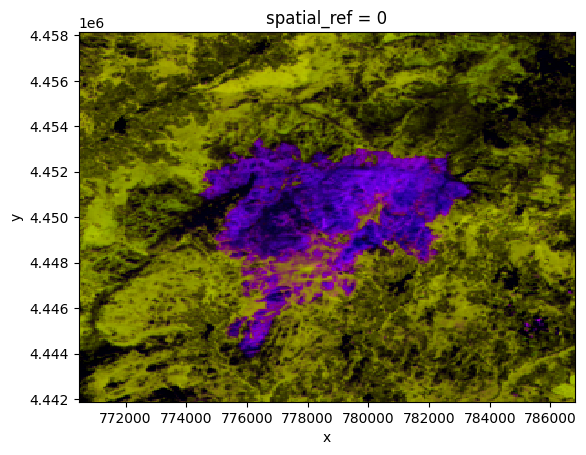

In [15]:
stack.plot.imshow(vmin=0, vmax=1, robust=True)